# Introduction
I worked on a Pokemon dataset that includes the type of Pokemon and their statistics. The objective of this project is to predict the Pokemon's HP based off of the given information. This project might be a bit challenging but definitely worth the struggle as we will be discovering new ways to identify a Pokemon's HP based on essential information. This project allows us to relive our childhood. If we are able to predict the Pokemon's HP based on the Attack, Defense, Sp. Atk, Sp. Def, Speed, and Generation to essentually become better "Pokemon trainers" and eventually Pokemon masters.

Clear Description of the Source Data Set (Predictions and Features)
This project consists of the Pokemon.csv data set which includes 13 features, with 800 samples. The data set consists of columns pertaining to the Pokemon's statistics such as: Type, HP, Attack, Defense, etc. Some of the features that will be used as predictors are: HP, Attack, Defense, Sp. Atk, Sp. Def.

After getting an idea of the data that we were working with, I decided to drop Total and Type 2 as those features would not be needed in order to make our predictions. After dropping some features, the data that was left behind contained 2 categorical features: Name, and Type 1 and 8 numerical features: #, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, and Generation.

In [2]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display


# allow output to span multiple output lines in the console
pd.set_option('display.max_columns', 500)

# switch to seaborn default stylistic parameters
# see the useful https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set()
sns.set_context('paper') # 'talk' for slightly larger

# change default plot size
rcParams['figure.figsize'] = 9,7

In [5]:
#import pokemon dataframe
df = pd.read_csv("/Users/tony/Downloads/Pokemon-HP-Predictions-main/Pokemon.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [7]:
# Get an idea of what info the Data frame has
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


Text(0.5, 1.0, 'Pokemon Types')

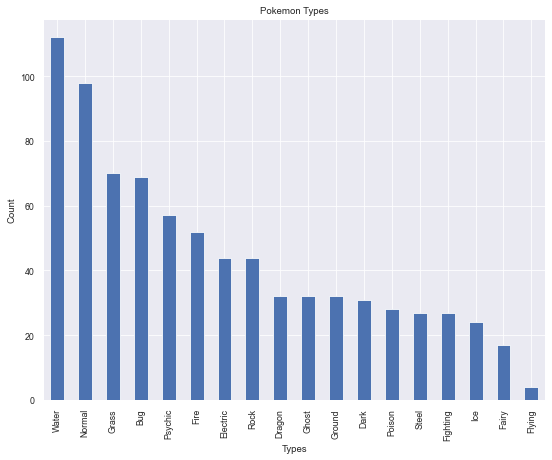

In [8]:
df['Type 1'].value_counts().plot(kind='bar')
plt.ylabel("Count")
plt.xlabel("Types")
plt.title('Pokemon Types')

Text(0.5, 1.0, 'Average Stats of Pokemon')

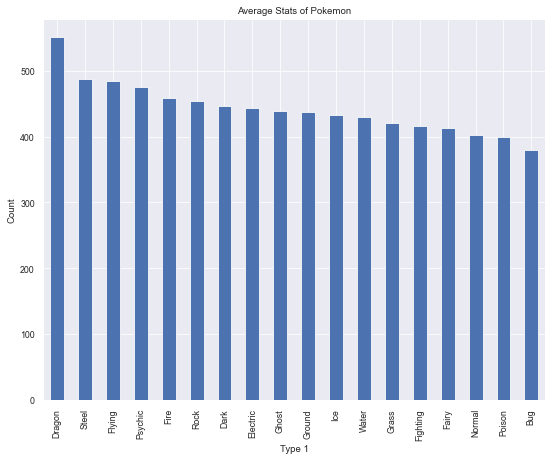

In [10]:
#Showing the total average of the Pokemon's stats combined per type
df.groupby(['Type 1'])['Total'].mean().sort_values(ascending = False).plot(kind='bar')
plt.ylabel("Count")
plt.xlabel("Type 1")
plt.title('Average Stats of Pokemon')

Text(0.5, 1.0, 'Average HP with type of Pokemon')

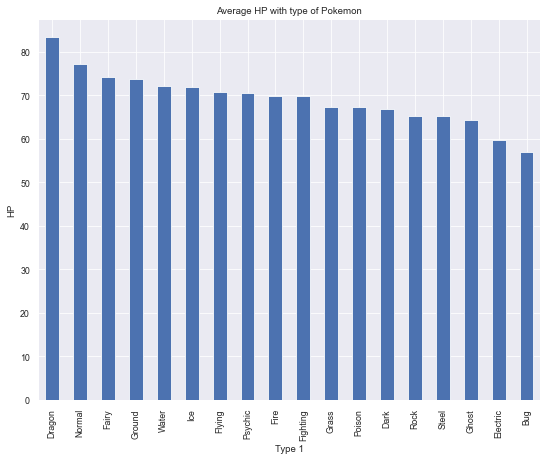

In [11]:
#Displaying average HP per Pokemon Type
df.groupby(['Type 1'])['HP'].mean().sort_values(ascending = False).plot(kind='bar')
plt.ylabel("HP")
plt.xlabel("Type 1")
plt.title('Average HP with type of Pokemon')

Text(0.5, 1.0, 'Number of Generations in set')

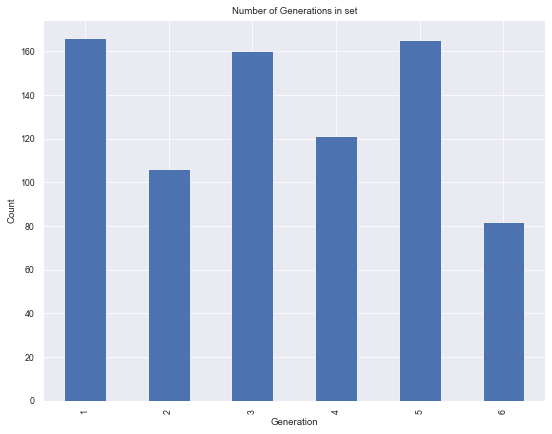

In [12]:
#Displaying the amount of pokemon created in each generation within our dataset
df['Generation'].value_counts().sort_index().plot(kind='bar')
plt.ylabel("Count")
plt.xlabel("Generation")
plt.title('Number of Generations in set')

In [13]:
#Dropping "Total" and "Type 2" since they were not going to be relevant of our predictions and model.¶
df.drop(['Total', 'Type 2'], axis=1)

,#,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,80,160,60,170,130,80,6,True


Preliminary Work on Machine Learning to make Predictions
We will use numerical data from the "HP" and calculations (total's/averages) from the "Attack" , "Defense", "Sp. Attack", "Sp. Defense" to try to predict a Pokemon's Type as well as Generation and HP. We will be using kNN classification and regression algorithms for our predictions and will determine which one is the most accurate one as well as calculate which prediction will be the most accurate

# Linear Regression Prediction on HP

In [14]:
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

Using a subset of the data set for training and test data. I will keep an unscaled version of the data for one of the experiments that we will be conducting. Since our dataframe is not too large I will then conduct the prediction experiments with the entire dataframe to compare the differences.

This first set of plots we see the relationships between HP and some of the other features.
I will be analyzing the relationship that the Pokemon's statistics have. In order to to come up with a strategy to effectively predict a Pokemon's HP.

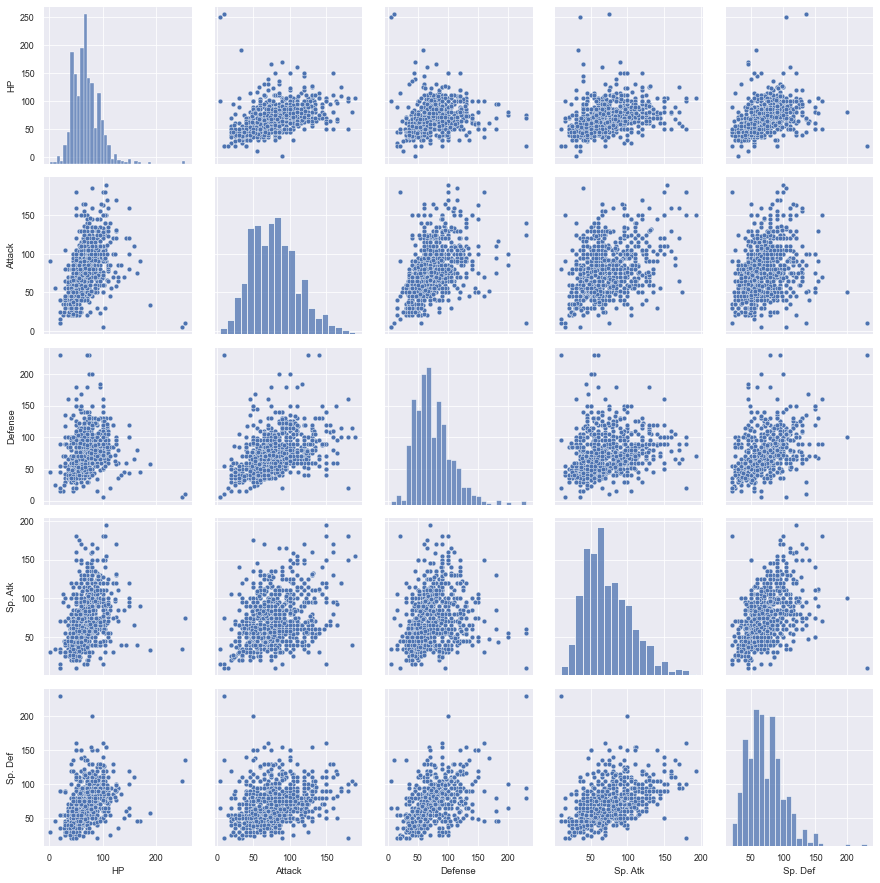

In [15]:
sub_df = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def']]
g = sns.PairGrid(sub_df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot);

# Linear regression with one feature "Attack"
To start off our linear regression predictions, we will only use one feature at first and see what is returned. Based off of the analysis we conduct, we will add more features.



In [17]:
X = df[['Attack']].values
y = df['HP'].values

regr = LinearRegression()
regr.fit(X,y)

LinearRegression()

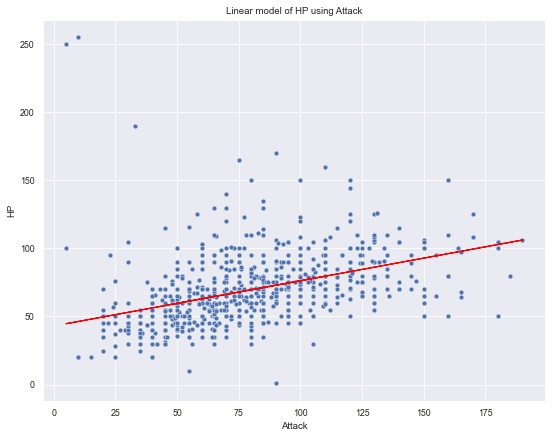

In [18]:
Y_pred = regr.predict(X)
sns.scatterplot(data = df, x ='Attack', y = 'HP')
plt.plot(X, Y_pred, color = 'red')
plt.title("Linear model of HP using Attack")
plt.show()

In this graph we will be displaying the relationship between HP and Attack of a Pokemon. In doing so, we can visually see if there are some correlations between the two. We can see that the majority of the data follows the regression line with only a few outliers.

In [20]:
print('Intercept: ', "{:.2f}".format(regr.intercept_))
print('Coefficient for Attack: ', "{:.2f}".format(regr.coef_[0]))
print('r-squared value:', "{:.2f}".format(regr.score(X,y)))

Intercept:  43.01
Coefficient for Attack:  0.33
r-squared value: 0.18


# This model shows that for every increase on Attack units our prediction in HP will go up by .33 health points!